# Statistical Perspectives in Machine Learning for Crop Recommendations

Create a crop recommendation system utilizing current weather conditions to provide farmers with tailored suggestions for optimal crop choices, enhancing decision-making in agriculture .

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

# Data Collection

In [2]:
df1 = pd.read_csv("C:/Users/hp/Downloads/Crop_recommendation (1).csv")
df1.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [3]:
df1.shape

(2200, 8)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
df1.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [6]:
df1.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
df1.duplicated().sum()

0

In [8]:
df1.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
df1['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [11]:
df1['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

<AxesSubplot:xlabel='count', ylabel='label'>

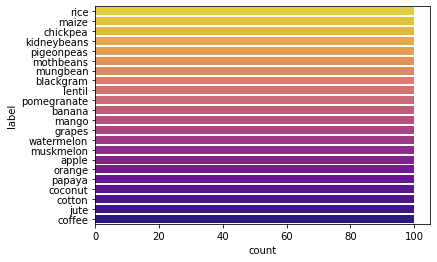

In [12]:
sn.countplot(y='label',data=df1, palette="plasma_r")

# Exploratory Data Analysis (EDA)

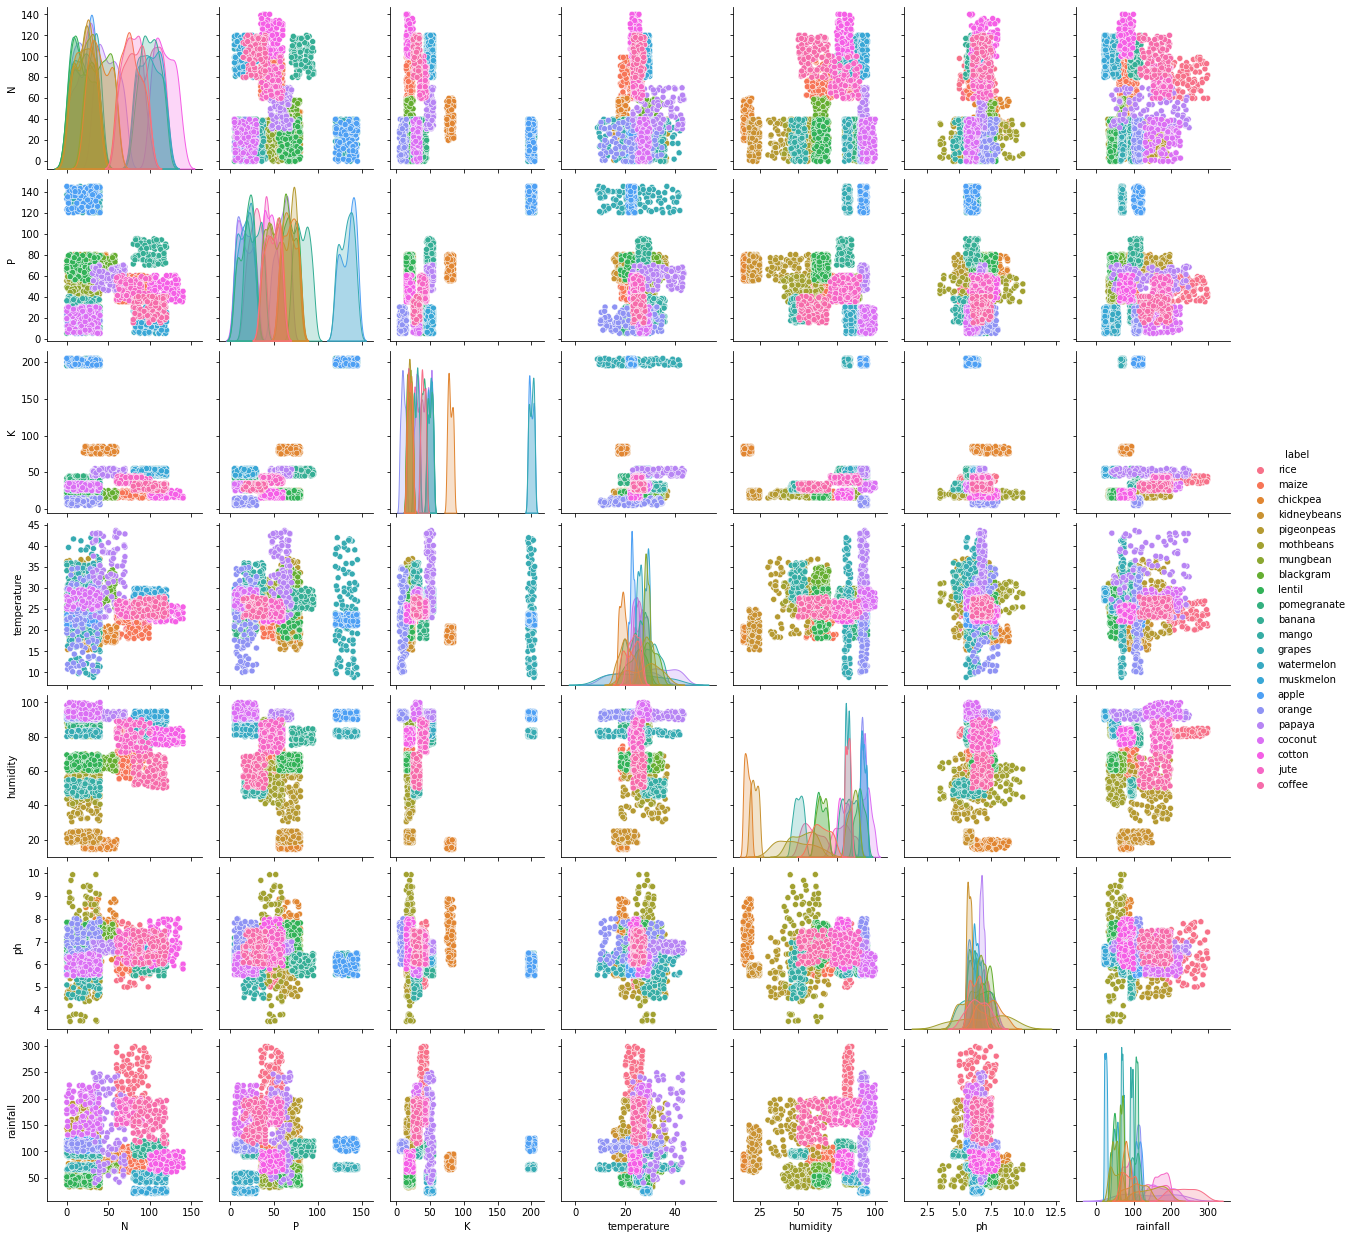

In [13]:
sn.pairplot(df1, hue = 'label')

In [16]:
corr = df1.corr()
corr

N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000

 obsevation:
 A strong positive correlation between Phosphorus and potassium(0.736232). As the level of Phosphorus increases, the level of    Potassium tends to increase significantly.
 Almost no correlation between Humidity and pH(-0.008483). Humidity and pH are not strongly related in this dataset.

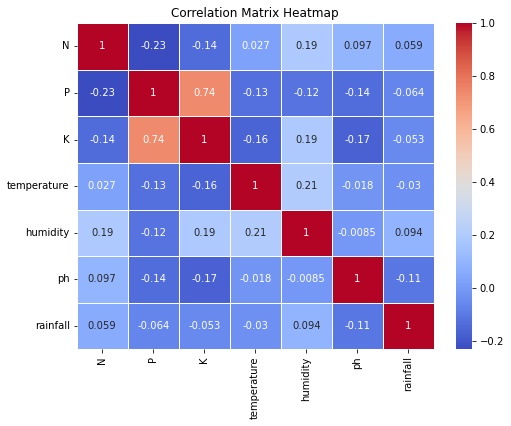

In [17]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

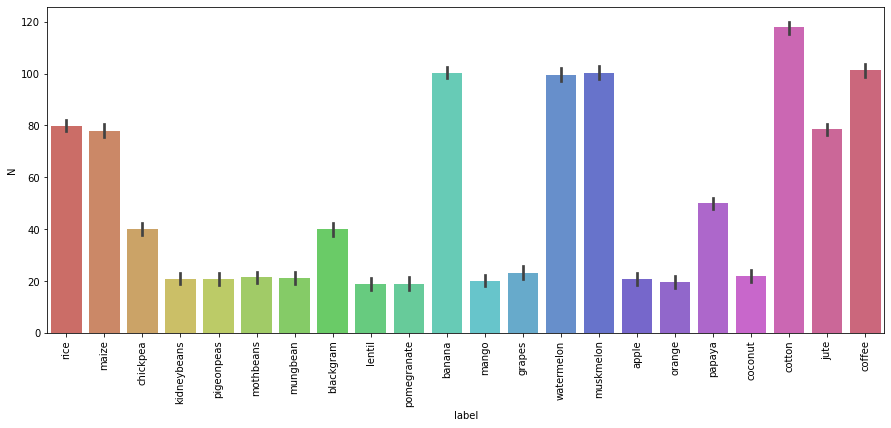

In [18]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'N', x = 'label', data=df1, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

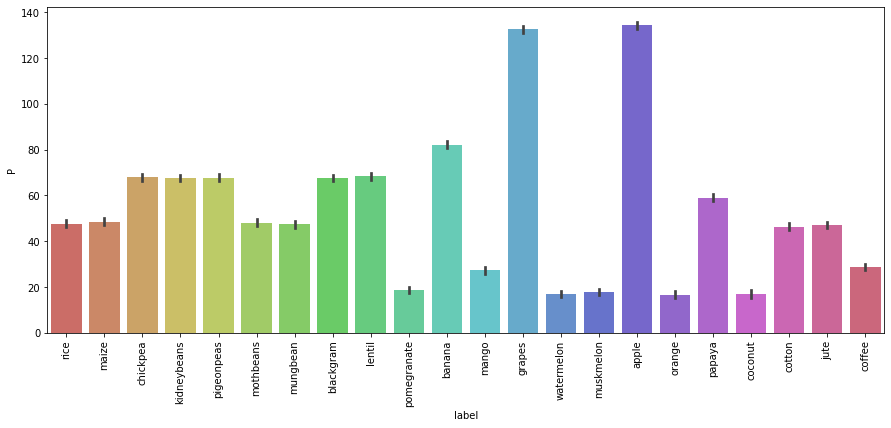

In [19]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'P', x = 'label', data=df1, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

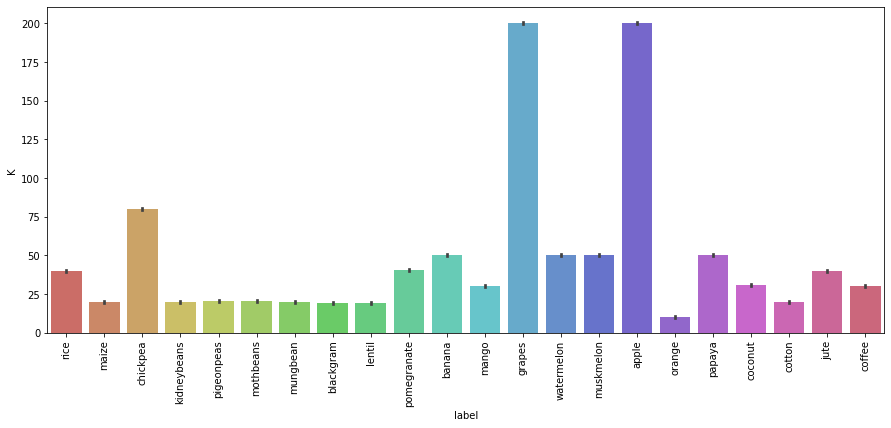

In [20]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'K', x = 'label', data=df1, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

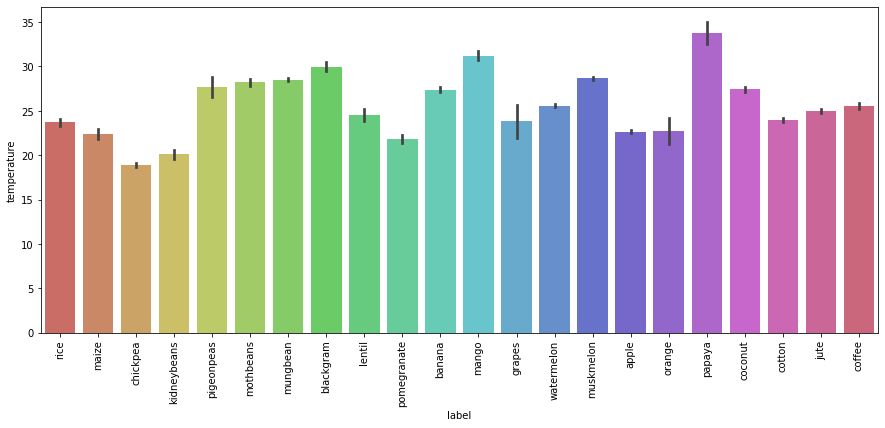

In [21]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'temperature', x = 'label', data=df1, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

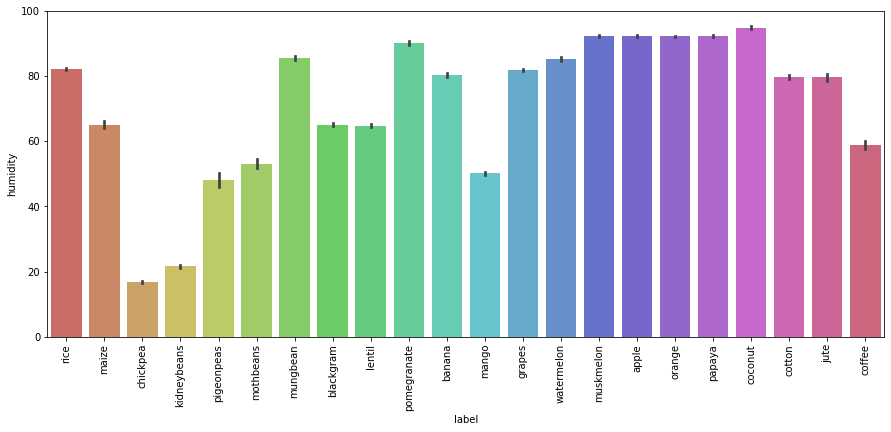

In [22]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'humidity', x = 'label', data=df1, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

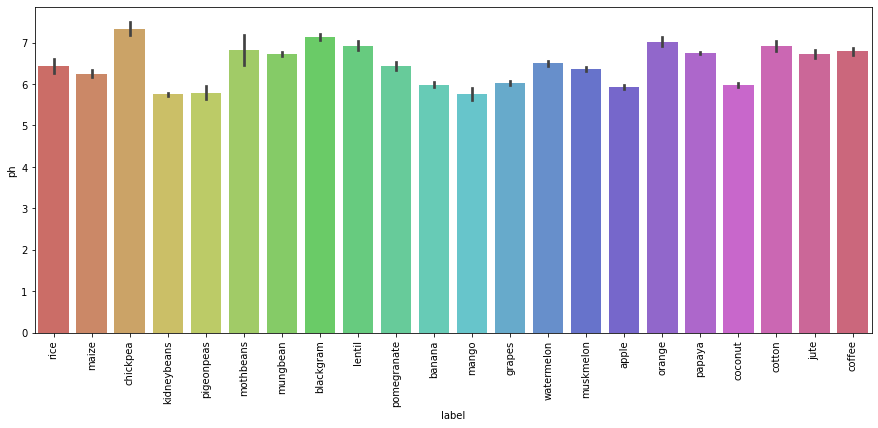

In [23]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'ph', x = 'label', data=df1, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

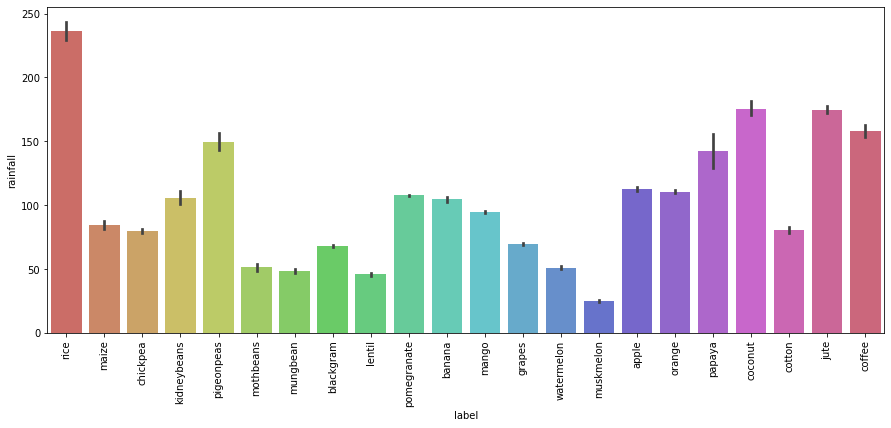

In [24]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'rainfall', x = 'label', data=df1, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

Inference:Rice,Maize,Jute has same values of N,P,temperature,ph.Maize crop has less value of potassium,humidity compared to Jute and Rice.But interms of rainfall Rice has highest rainfall value,jute has moderate rainfall ,maize crop need less rainfall compared to rice and jute.

Inference:To grow watermelon and muskmelon we need to have on avg temp of 24deg with high humidity and it can grow in low rainfall conditions.it also need less k,p compared to other crops but it needs high nitrogen to grow.

Inference:To grow pulses i.e, chickpea,kidneybeans,pigeonpeas,mothbeans,mungbean,blackgram and lentil same NPK levels,temperature,ph,rainfall are required but humidity conditions are varied.So,based on humidity conditions we can grow any of these pulses in the same land.


Grapes and Apple crops need more Potassium,Phosphorus percentage to grow.

Every crop needs an average of 25 degrees of temperature and an average of 6.5 pH. 

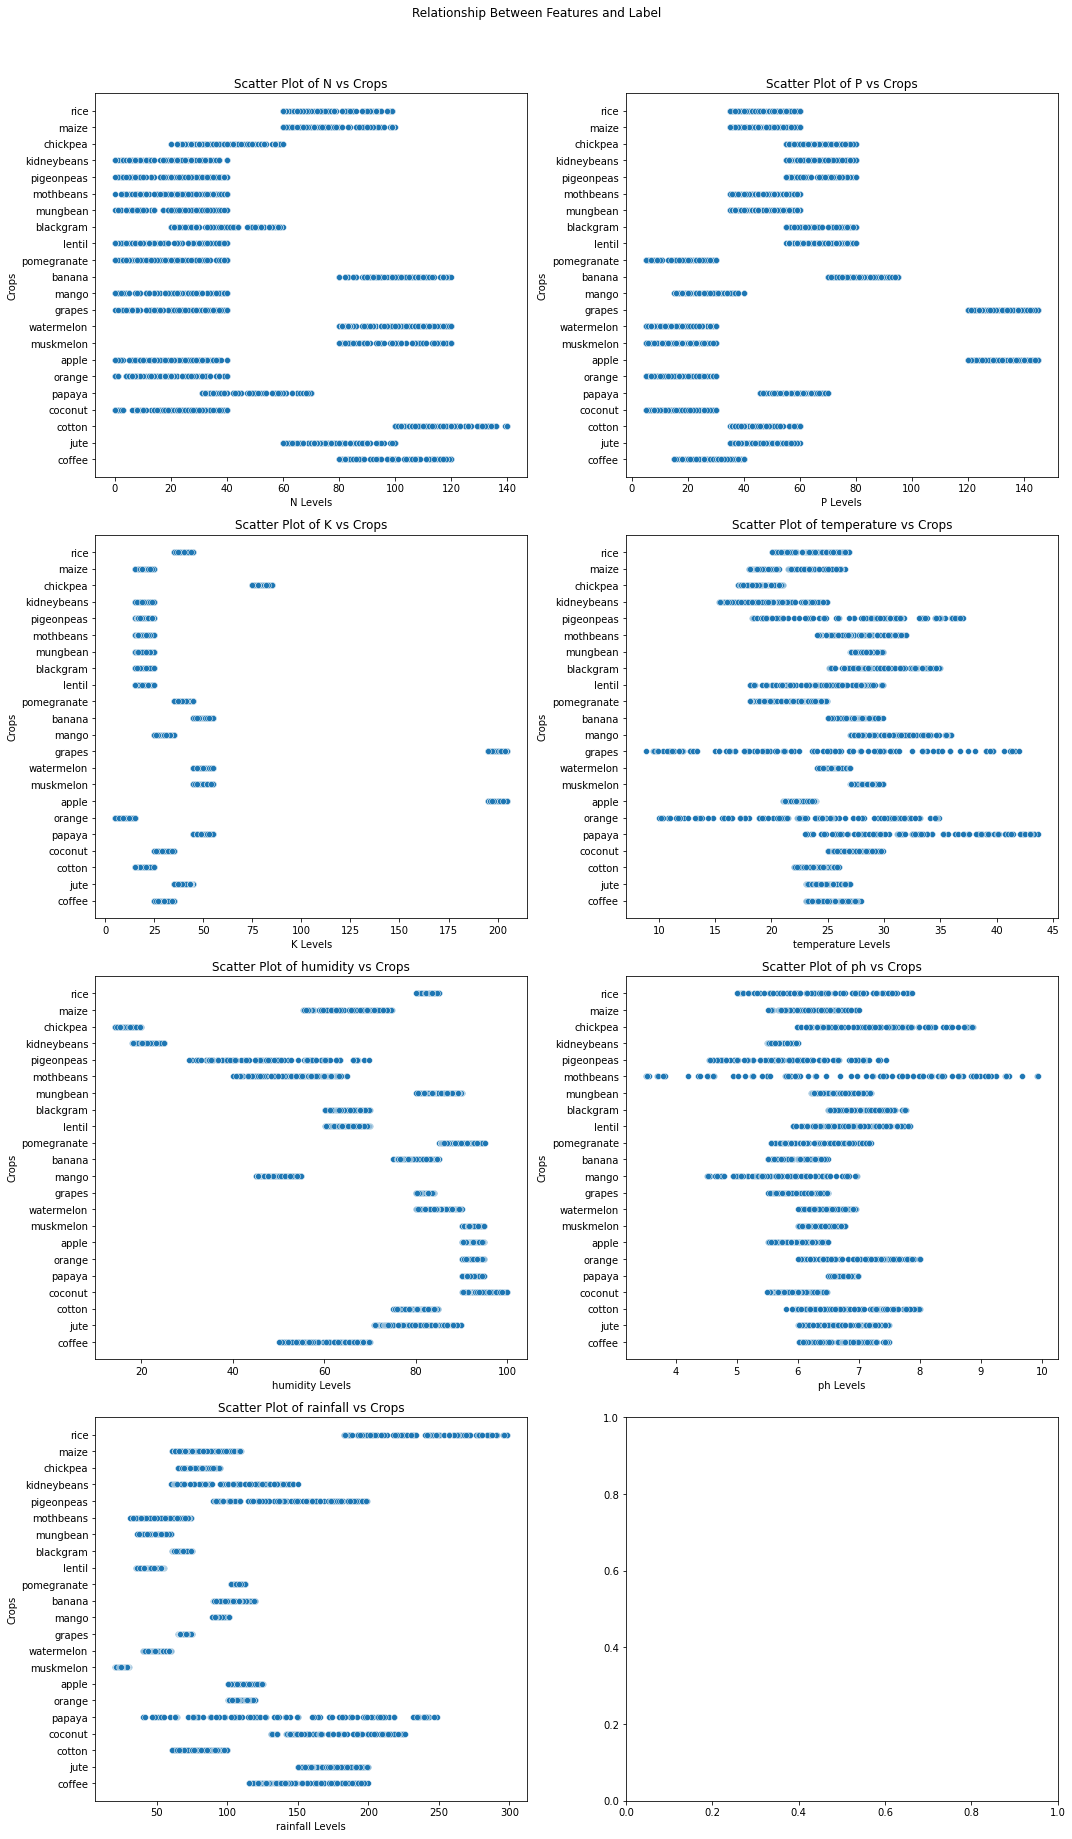

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


columns_to_visualize = df1.columns[df1.columns != 'label']
fig, axes = plt.subplots(4, 2, figsize=(15, 25))
fig.suptitle('Relationship Between Features and Label', y=1.02)
axes = axes.flatten()


for i, column in enumerate(columns_to_visualize):
    sns.scatterplot(x=column, y='label', data=df1, ax=axes[i])
    axes[i].set_title(f'Scatter Plot of {column} vs Crops')
    axes[i].set_xlabel(f'{column} Levels')
    axes[i].set_ylabel('Crops')
plt.tight_layout()


plt.show()



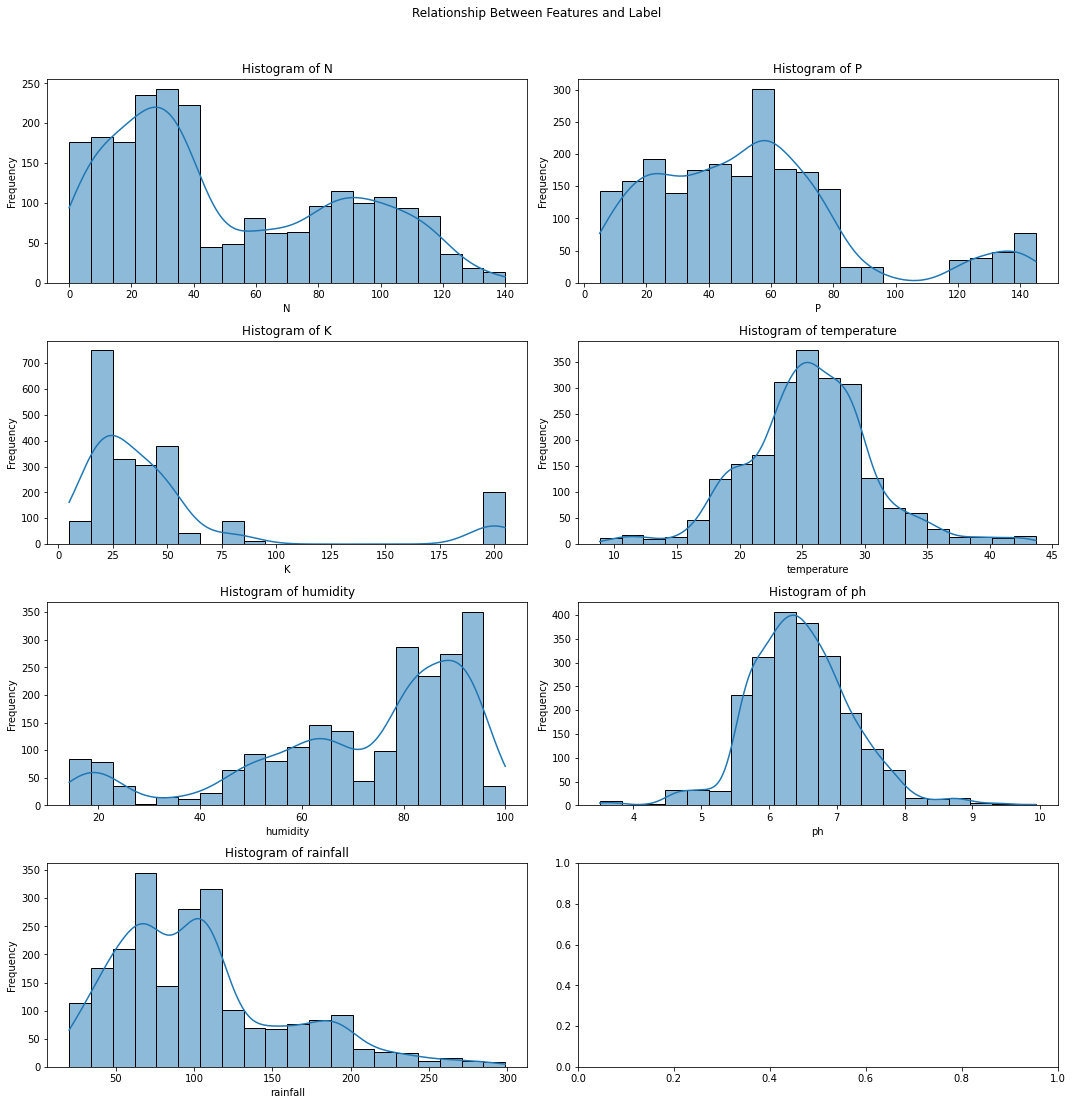

In [26]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


columns_to_visualize = df1.columns[df1.columns != 'label']

fig, axes = plt.subplots(4, 2, figsize=(15, 15))
fig.suptitle('Relationship Between Features and Label', y=1.02)
axes = axes.flatten()

for i, column in enumerate(columns_to_visualize ):
    sns.histplot(x=column, data=df1, kde=True, ax=axes[i], bins=20)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

    
plt.tight_layout()
plt.show()


Temperature and Ph are Normally distributed

In [27]:
from scipy.stats import skew
numerical_columns = df1.select_dtypes(include=['float64', 'int64']).columns
skewness_values = df1[numerical_columns].apply(lambda x: skew(x))
print("Skewness:")
print(skewness_values)

Skewness:
N              0.509374
P              1.010083
K              2.373547
temperature    0.184807
humidity      -1.090963
ph             0.283736
rainfall       0.965098
dtype: float64


In [28]:
import pandas as pd
from scipy.stats import kurtosis


numerical_columns = df1.select_dtypes(include=['float64', 'int64']).columns
kurtosis_values = df1[numerical_columns].apply(lambda x: kurtosis(x))

print("Kurtosis:")
print(kurtosis_values)


Kurtosis:
N             -1.058562
P              0.855599
K              4.436523
temperature    1.227029
humidity       0.298722
ph             1.649095
rainfall       0.602974
dtype: float64


In [29]:
import plotly.express as px
fig=px.box(df1,y="N",points="all")
fig.show()

In [30]:
fig=px.box(df1,y="rainfall",points="all")
fig.show()

In [31]:
fig=px.box(df1,y="K",points="all")
fig.show()

# Data Preprocessing

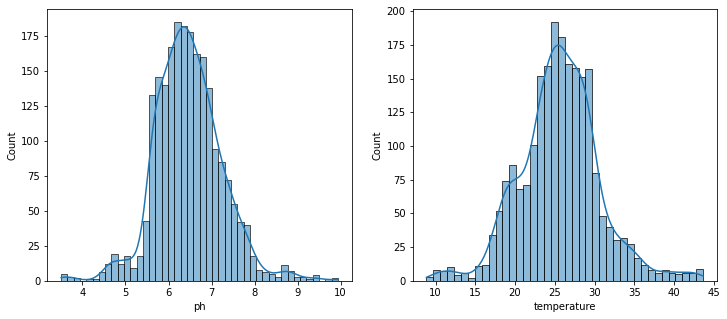

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sn.histplot(df1['ph'],kde='True')
plt.subplot(1, 2, 2)
sn.histplot(df1['temperature'],kde='True')
plt.show()


Encoding the Categorical Column

In [33]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
df1['crop_num']=df1['label'].map(crop_dict)

In [34]:
print(df1.dtypes)

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
crop_num         int64
dtype: object


In [35]:
df1.head()

N   P   K  temperature   humidity        ph    rainfall label  crop_num
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice         1
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice         1
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice         1
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice         1
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice         1

In [36]:
X = df1.drop(['crop_num','label'],axis=1)
Y = df1['crop_num']

In [37]:
X

N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]

In [38]:
Y

0        1
1        1
2        1
3        1
4        1
        ..
2195    22
2196    22
2197    22
2198    22
2199    22
Name: crop_num, Length: 2200, dtype: int64

# Data Splitting

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [41]:
y_train.shape

(1760,)

In [42]:
x_test.shape

(440, 7)

In [63]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

x_train = ms.fit_transform(x_train)
x_test = ms.transform(x_test)
x_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Model Selection

In [76]:
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes'  : GaussianNB(),
    'Support Vector Machine': SVC()
}
l=[]

for name, md in models.items():
    md.fit(x_train,y_train)
    ypred = md.predict(x_test)
    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")
    l.append(accuracy_score(y_test,ypred))
print(l)
    


Logistic Regression  with accuracy : 0.9204545454545454
K-Nearest Neighbors  with accuracy : 0.9704545454545455
Decision Tree  with accuracy : 0.9818181818181818
Random Forest  with accuracy : 0.9931818181818182
Naive Bayes  with accuracy : 0.9954545454545455
Support Vector Machine  with accuracy : 0.9681818181818181
[0.9204545454545454, 0.9704545454545455, 0.9818181818181818, 0.9931818181818182, 0.9954545454545455, 0.9681818181818181]


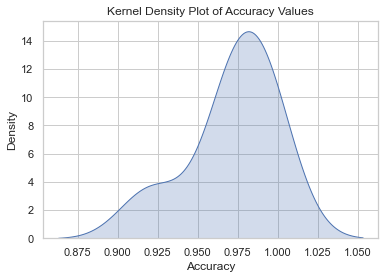

In [77]:
sns.set(style="whitegrid")
sns.kdeplot(data=l, shade=True)
plt.title('Kernel Density Plot of Accuracy Values')
plt.xlabel('Accuracy')
plt.ylabel('Density')
plt.show()

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,f1_score

for clf_name, clf in models.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(f"Confusion Matrix for {clf.__class__.__name__}:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

Confusion Matrix for LogisticRegression:
[[15  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0 20  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0 

# Model Evaluation

In [87]:

for clf_name, clf in models.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='micro')  
    recall = recall_score(y_test, y_pred, average='micro') 
    f1 = f1_score(y_test, y_pred, average='micro')
    
    print(f"Metrics for {clf_name}:")
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print("\n")


Metrics for Logistic Regression:
Precision: 0.9204545454545454
Recall: 0.9204545454545454
F1 Score: 0.9204545454545455


Metrics for K-Nearest Neighbors:
Precision: 0.9704545454545455
Recall: 0.9704545454545455
F1 Score: 0.9704545454545455


Metrics for Decision Tree:
Precision: 0.9886363636363636
Recall: 0.9886363636363636
F1 Score: 0.9886363636363636


Metrics for Random Forest:
Precision: 0.9931818181818182
Recall: 0.9931818181818182
F1 Score: 0.9931818181818182


Metrics for Naive Bayes:
Precision: 0.9954545454545455
Recall: 0.9954545454545455
F1 Score: 0.9954545454545455


Metrics for Support Vector Machine:
Precision: 0.9681818181818181
Recall: 0.9681818181818181
F1 Score: 0.968181818181818




In [49]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
ypred = rfc.predict(x_test)
accuracy_score(y_test,ypred)

0.9931818181818182

In [52]:
df1.head()

N   P   K  temperature   humidity        ph    rainfall label  crop_num
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice         1
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice         1
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice         1
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice         1
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice         1

In [74]:
def recommendation(N,P,k,temperature,humidity,ph,rainfal):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
    transformed_features = ms.fit_transform(features)
    transformed_features = sc.fit_transform(transformed_features)
    prediction = rfc.predict(transformed_features).reshape(1,-1)
    
    return prediction[0] 

In [75]:
N = 90
P = 42
k = 43
temperature = 20.87
humidity = 82.00
ph = 6.5
rainfall = 202.93


predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)


crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

Papaya is a best crop to be cultivated 
